<img>
<html>
  <head>
  </head>

  <body>
    <img src="image/molecule image.jpg">
  </body>
</html>

# Overview

A common challenge in experimental chemistry is inferring causality from small datasets. Chemists often synthesize around 100 molecules, measure a key property, and then attempt to identify which molecular features influence that property. This process typically relies on expert intuition to select meaningful features, followed by multivariate linear regression for feature importance analysis.

Our recent work at the **NSF's Molecule Maker Lab Institute**, published in *Nature*, demonstrated that a **purely data-driven machine learning approach** can:
1. Identify important molecular features previously overlooked by experts.
2. Generate a regression model for photostability that performs well on newly synthesized molecules.

This approach has shown significant promise in discovering and enhancing **molecular photostability** (e.g., for organic solar cells), and we aim to build upon this success to enable broader data-driven discoveries in chemistry.

---

# Challenge

The goal of this competition is to:
> **Identify the best algorithm to select the most informative molecular features and accurately regress the experimental property (T80) for new molecules.**

You are provided with:
- A small dataset (~100 molecules).
- A large number of calculated (but mostly irrelevant) features.
- An experimental property: **photostability lifetime (T80)**.

---

# Dataset & Resources

- **Training and test datasets** include ~150 molecular features.
- **SMILES strings** (textual molecular representations) are included.
- Features can be extended using **RDKit** or other cheminformatics tools.
- Example RDKit script is available in the `SmilesStrings Dataset`.

You may also utilize:
- **Pre-trained models** (e.g., FARM or other SMILES-based models).
- Traditional models without any pre-trained feature extraction.

---

# Model Development Insights

In our previous research, we evaluated **Support Vector Regression (SVR)** models trained on approximately **2.5 million combinations** of molecular features.

Key findings:
- **Top 3 predictive features** identified:
  - `TDOS4.0`
  - `NumHeteroatoms` (number of non-carbon, non-hydrogen atoms)
  - `Mass`
- **TDOS4.0** (and its correlated counterpart `TDOS3.9`) was physically validated.
- **NumHeteroatoms** and **Mass** were not physically analyzed yet — open for discovery.

---

# Evaluation

To encourage innovation:
- We have synthesized **9 new molecules** and measured their **T80 values**.
- These will serve as the test set to evaluate submitted models.

Prizes will be awarded for:
- Best model **using pre-trained SMILES models**.
- Best model **not using pre-trained models** (classical feature-based approach).

---

Good luck, and happy modeling!


---
- About the Author : Sajjad Ali Shah
- Contact: [Linkedin](www.linkedin.com/in/sajjad-ali-shah-120341305)
- Dataset: [Link](https://www.kaggle.com/competitions/molecular-machine-learning/overview)
- Date : 02/10/2024
---

In [15]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
import warnings
warnings.filterwarnings("ignore")

In [16]:
# load the data 
df_train=pd.read_csv("../molecular-machine-learning/data/train.csv")
df_test=pd.read_csv("../molecular-machine-learning/data/test.csv")
submission=pd.read_csv("../molecular-machine-learning/data/sample_submission.csv")

In [17]:
# let us see the data
df_train.head()

,Batch_ID,T80,Smiles,Mass,HAcceptors,HDonors,LogP,Asphericity,Rg,TPSA,...,SDOS4.5,SDOS4.6,SDOS4.7,SDOS4.8,SDOS4.9,SDOS5.0,SDOS5.1,SDOS5.2,SDOS5.3,SDOS5.4
0,Train-01,103.86,CCCCCCCCCCCCc1ccsc1-c1ccc(-c2cccs2)cc1,410.692,2,0,9.6070,0.301361,5.187321,0.00,...,1.717761,1.970186,1.760071,1.224983,0.664733,0.282353,0.096763,0.034589,0.030793,0.057340
1,Train-02,101.13,CCCCCCCCCCCCc1ccsc1-c1cccs1,334.594,2,0,7.9400,0.367472,4.141425,0.00,...,0.012396,0.046031,0.133124,0.299840,0.525958,0.718549,0.764711,0.634854,0.414866,0.225909
2,Train-03,78.30,CN1CCN(S(=O)(=O)c2ccc(-c3ccc(-c4cccs4)cc3)cc2)CC1,398.553,4,0,4.0182,0.799589,5.368024,40.62,...,2.421162,2.703267,2.352276,1.595867,0.845839,0.354620,0.127878,0.060600,0.064782,0.098908
3,Train-04,71.88,O=C1c2ccccc2C(=O)c2cc(-c3ccc(-c4cccs4)s3)ccc21,372.470,4,0,5.9190,0.793825,4.948903,34.14,...,0.886320,0.579059,0.345148,0.246564,0.276259,0.381997,0.495304,0.566935,0.594203,0.614075
4,Train-05,68.37,CC(C)(C)OC(=O)n1ccc2ccc(-c3ccc(-c4ccc(-c5cccs5...,457.620,5,0,8.5485,0.671148,5.994751,31.23,...,0.487723,0.245764,0.249019,0.363222,0.474953,0.505358,0.440671,0.330129,0.234649,0.183111


In [41]:
# Display all columns in the DataFrame
pd.set_option('display.max_columns', None)

# Now display the DataFrame
df_train.head()

,Batch_ID,T80,Smiles,Mass,HAcceptors,HDonors,LogP,Asphericity,Rg,TPSA,RingCount,NumRotatableBonds,NumHeteroatoms,HOMOm1(eV),HOMO(eV),LUMO(eV),LUMOp1(eV),PrimeState,PrimeExcite(eV),PrimeExcite(osc),DipoleMoment(Debye),SurfaceCharge,ChargeCorrection,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,T19,T20,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19,S20,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10,O11,O12,O13,O14,O15,O16,O17,O18,O19,O20,TDOS1.5,TDOS1.6,TDOS1.7,TDOS1.8,TDOS1.9,TDOS2.0,TDOS2.1,TDOS2.2,TDOS2.3,TDOS2.4,TDOS2.5,TDOS2.6,TDOS2.7,TDOS2.8,TDOS2.9,TDOS3.0,TDOS3.1,TDOS3.2,TDOS3.3,TDOS3.4,TDOS3.5,TDOS3.6,TDOS3.7,TDOS3.8,TDOS3.9,TDOS4.0,TDOS4.1,TDOS4.2,TDOS4.3,TDOS4.4,TDOS4.5,TDOS4.6,TDOS4.7,SDOS2.5,SDOS2.6,SDOS2.7,SDOS2.8,SDOS2.9,SDOS3.0,SDOS3.1,SDOS3.2,SDOS3.3,SDOS3.4,SDOS3.5,SDOS3.6,SDOS3.7,SDOS3.8,SDOS3.9,SDOS4.0,SDOS4.1,SDOS4.2,SDOS4.3,SDOS4.4,SDOS4.5,SDOS4.6,SDOS4.7,SDOS4.8,SDOS4.9,SDOS5.0,SDOS5.1,SDOS5.2,SDOS5.3,SDOS5.4
0,Train-01,103.86,CCCCCCCCCCCCc1ccsc1-c1ccc(-c2cccs2)cc1,410.692,2,0,9.6070,0.301361,5.187321,0.00,3,13,2,-8.8374,-7.8893,0.3472,1.4773,1,4.604816,0.987886,0.57258,-0.038114,0.00245,3.135243,3.673961,4.292212,4.432521,4.475070,4.486092,4.755836,4.813945,5.640073,5.913449,6.030660,6.114731,6.245629,6.267871,6.451262,6.490043,6.554413,6.597794,6.778545,6.957696,4.604816,5.008457,5.535707,5.777369,5.806281,6.180701,6.321331,6.460635,6.465954,6.654304,6.656871,6.819904,6.920167,6.951335,7.059793,7.263257,7.330665,7.407061,7.430419,7.571409,0.987886,0.000843,0.015068,0.017847,0.104293,0.056222,0.072319,0.059375,0.051553,0.021097,0.022424,0.028070,0.003625,0.038192,0.010176,0.602064,0.016987,0.065429,0.015649,0.118870,6.070000e-15,3.200000e-13,1.310000e-11,4.180000e-10,1.040000e-08,2.010000e-07,3.030000e-06,3.560000e-05,3.255820e-04,0.002319,0.012859,0.055546,0.186862,0.489651,0.999874,1.593854,1.996452,2.013180,1.768059,1.611227,1.745397,2.002522,2.044195,1.765658,1.463189,1.631723,2.629855,4.422731,6.485324,8.017557,8.478704,7.950547,6.865207,1.750000e-24,2.990000e-22,3.960000e-20,4.090000e-18,3.290000e-16,2.060000e-14,1.000000e-12,3.810000e-11,1.130000e-09,2.600000e-08,4.660000e-07,6.510000e-06,7.080000e-05,6.001750e-04,3.961032e-03,2.035942e-02,0.081498,0.254073,0.616874,1.166442,1.717761,1.970186,1.760071,1.224983,0.664733,0.282353,0.096763,0.034589,0.030793,0.057340
1,Train-02,101.13,CCCCCCCCCCCCc1ccsc1-c1cccs1,334.594,2,0,7.9400,0.367472,4.141425,0.00,2,12,2,-9.0870,-8.2034,0.8586,1.8912,1,5.074787,0.386292,1.68691,-0.039476,0.00243,3.385683,3.898514,4.438670,4.616185,5.703688,5.850009,6.111718,6.188610,6.315764,6.339197,6.467256,6.607167,6.695862,6.890114,7.120618,7.124449,7.201143,7.294277,7.600110,7.752693,5.074787,5.814575,5.920305,6.014307,6.291501,6.587479,6.659053,6.802349,6.891912,7.142401,7.317014,7.322656,7.652938,7.782386,7.858026,8.006802,8.008972,8.124261,8.245476,8.323199,0.386292,0.075833,0.018200,0.090356,0.013351,0.007066,0.034101,0.001254,0.032699,0.042854,0.009285,0.013903,0.003854,0.003978,0.175448,0.046715,0.256225,0.023161,0.121842,0.007268,9.920000e-20,9.760000e-18,7.480000e-16,4.470000e-14,2.080000e-12,7.520000e-11,2.120000e-09,4.660000e-08,7.960000e-07,0.000011,0.000110,0.000889,0.005591,0.027398,0.104557,0.310793,0.719839,1.300789,1.842464,2.078892,1.968111,1.778528,1.801242,2.012835,2.124073,1.968890,1.751188,1.848447,2.406233,3.155962,3.609764,3.433183,2.677125,7.890000e-37,4.350000e-34,1.870000e-31,6.240000e-29,1.620000e-26,3.290000e-24,5.200000e-22,6.400000e-20,6.130000e-18,4.570000e-16,2.650000e-14,1.200000e-12,4.230000e-11,1.160000e-09,2.480000e-08,4.130000e-07,0.000005,0.000054,0.000425,0.002600,0.012396,0.046031,0.133124,0.299840,0.525958,0.718549,0.764711,0.634854,0.414866,0.225909
2,Train-03,78.30,CN1CCN(S(=O)(=O)c2ccc(-c3ccc(-c4cccs4)cc3)cc2)CC1,398.553,4,0,4.0182,0.799589,5.368024,40.62,4,4,6,-8.2055,-8.0072,0.0730,1.2317,1,4.591711,1.277359,8.93223,-0.032458,-0.00467,3.175326,3.780857,4.331316,4.494994,4.526621,4.553525,4.610283,4.707483,4.7

In [42]:
df_train.describe()

,T80,Mass,HAcceptors,HDonors,LogP,Asphericity,Rg,TPSA,RingCount,NumRotatableBonds,NumHeteroatoms,HOMOm1(eV),HOMO(eV),LUMO(eV),LUMOp1(eV),PrimeState,PrimeExcite(eV),PrimeExcite(osc),DipoleMoment(Debye),SurfaceCharge,ChargeCorrection,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,T19,T20,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19,S20,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10,O11,O12,O13,O14,O15,O16,O17,O18,O19,O20,TDOS1.5,TDOS1.6,TDOS1.7,TDOS1.8,TDOS1.9,TDOS2.0,TDOS2.1,TDOS2.2,TDOS2.3,TDOS2.4,TDOS2.5,TDOS2.6,TDOS2.7,TDOS2.8,TDOS2.9,TDOS3.0,TDOS3.1,TDOS3.2,TDOS3.3,TDOS3.4,TDOS3.5,TDOS3.6,TDOS3.7,TDOS3.8,TDOS3.9,TDOS4.0,TDOS4.1,TDOS4.2,TDOS4.3,TDOS4.4,TDOS4.5,TDOS4.6,TDOS4.7,SDOS2.5,SDOS2.6,SDOS2.7,SDOS2.8,SDOS2.9,SDOS3.0,SDOS3.1,SDOS3.2,SDOS3.3,SDOS3.4,SDOS3.5,SDOS3.6,SDOS3.7,SDOS3.8,SDOS3.9,SDOS4.0,SDOS4.1,SDOS4.2,SDOS4.3,SDOS4.4,SDOS4.5,SDOS4.6,SDOS4.7,SDOS4.8,SDOS4.9,SDOS5.0,SDOS5.1,SDOS5.2,SDOS5.3,SDOS5.4
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,22.710476,601.389929,5.500000,0.309524,10.854289,0.532680,6.355368,36.990952,5.714286,11.690476,6.142857,-8.265029,-7.578000,-0.187200,0.658788,1.047619,4.009760,1.385899,4.184628,-0.035507,-0.001137,2.684830,3.208507,3.678015,3.917620,4.079763,4.187388,4.300076,4.410358,4.562055,4.694183,4.837191,4.939306,5.064152,5.194477,5.307742,5.407799,5.507786,5.611051,5.716033,5.809433,4.006488,4.557282,4.799952,5.022167,5.184051,5.340572,5.514441,5.611823,5.699403,5.814697,5.911529,6.024536,6.121079,6.197836,6.267911,6.351946,6.410216,6.482221,6.555987,6.636179,1.352492,0.274255,0.056487,0.104436,0.109670,0.124405,0.095961,0.106292,0.064797,0.096925,0.049866,0.066627,0.090017,0.113047,0.052203,0.121014,0.140996,0.104180,0.126342,0.115206,1.262340e-04,7.678360e-04,3.704963e-03,1.426115e-02,4.414634e-02,1.112423e-01,2.324006e-01,4.133326e-01,6.473532e-01,0.923738,1.228493,1.531782,1.785893,1.952168,2.033418,2.070295,2.103502,2.157338,2.268146,2.496339,2.879964,3.398943,4.015304,4.725563,5.543789,6.456541,7.409670,8.294578,8.940676,9.210593,9.155014,8.996158,8.876143,1.666055e-06,1.332953e-05,8.774136e-05,4.836460e-04,2.262263e-03,9.006433e-03,3.031134e-02,8.538859e-02,2.003771e-01,3.940804e-01,6.620685e-01,9.781096e-01,1.307477e+00,1.606103e+00,1.812135e+00,1.864938e+00,1.748148,1.511720,1.246257,1.027306,0.874759,0.763264,0.668653,0.595143,0.560035,0.571105,0.624577,0.706185,0.786314,0.833714
std,26.896407,176.251665,2.244234,0.604378,3.504098,0.217963,1.264587,30.888275,1.743080,6.884015,2.581089,0.485025,0.

In [19]:
# Description of the dataset
print(f"The dataset contains {df_train.shape[0]} rows and {df_train.shape[1]} columns.")
print("Here is a summary of the columns:")
print(f"- Total columns: {df_train.shape[1]}")
print(f"- Numerical columns: {df_train.select_dtypes(include=['int64', 'float64']).shape[1]}")
print(f"- Categorical columns: {df_train.select_dtypes(include=['object', 'category']).shape[1]}")
print(f"- Boolean columns: {df_train.select_dtypes(include=['bool']).shape[1]}")
print(f"- Columns with missing values: {df_train.isnull().sum().loc[df_train.isnull().sum() > 0].shape[0]}")


The dataset contains 42 rows and 146 columns.
Here is a summary of the columns:
- Total columns: 146
- Numerical columns: 144
- Categorical columns: 2
- Boolean columns: 0
- Columns with missing values: 0


In [20]:
# check the number of missing values in the data
print("Missing values in the dataset:")
print(df_train.isnull().sum().sum())


Missing values in the dataset:
0


In [13]:
# check the duplicates in the data 
duplicates = df_train.duplicated().sum()
duplicates_percentage = (duplicates / df_train.shape[0]) * 100
print(f"Number of duplicate rows: {duplicates} ({duplicates_percentage:.2f}%)")


Number of duplicate rows: 0 (0.00%)


In [24]:
df_train.columns

Index(['Batch_ID', 'T80', 'Smiles', 'Mass', 'HAcceptors', 'HDonors', 'LogP',
       'Asphericity', 'Rg', 'TPSA',
       ...
       'SDOS4.5', 'SDOS4.6', 'SDOS4.7', 'SDOS4.8', 'SDOS4.9', 'SDOS5.0',
       'SDOS5.1', 'SDOS5.2', 'SDOS5.3', 'SDOS5.4'],
      dtype='object', length=146)

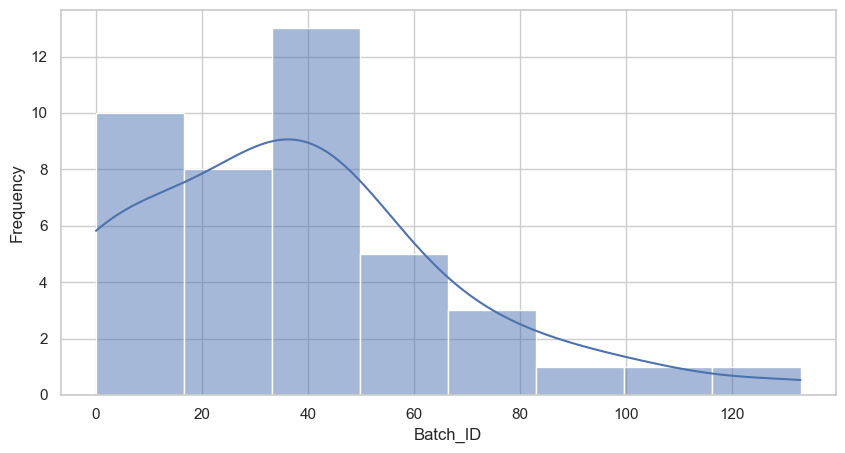

In [39]:
# visualize the column one by one 
plt.figure(figsize=(10, 5))
sns.histplot(df_train["TPSA"], kde=True)
plt.xlabel("Batch_ID")
plt.ylabel("Frequency")
plt.show()

In [19]:
# check the outliers in the data 
def check_outliers(data):
    outliers = {}
    for column in data.select_dtypes(include=[np.number]).columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = data[(data[column] < lower_bound) | (data[column] > upper_bound)].shape[0]
    return outliers

In [20]:
# now pass the parameters to check the outliers
outliers = check_outliers(df_train)
print("Outliers in the dataset:")

Outliers in the dataset:


In [22]:
# # lets checke the outliers throuh visulization
# def plot_outliers(data, outliers):
#     for column, count in outliers.items():
#         plt.figure(figsize=(10, 6))
#         sns.boxplot(x=data[column])
#         plt.title(f"Boxplot of {column} (Outliers: {count})")
#         plt.show()
# plot_outliers(df_train, outliers)

In [14]:
# submission = pd.DataFrame({'Batch_ID': test.Batch_ID,
#                        'T80': np.clip(y_test,0,None)})
# submission.to_csv('submission.csv', index=False)
# submission.head(10)